In [1]:
# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# library for train test split
from sklearn.model_selection import train_test_split
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [2]:
#metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [3]:
spam_data = pd.read_csv('spam_or_not_spam\spam_or_not_spam.csv', sep =',',names=["email", "label"], skiprows=1)
spam_data = spam_data.astype(str) # Read correctly the type of emails
spam_data.head()

,email,label
0,mike bostock said received from trackingNUMBE...,0
1,no i was just a little confused because i m r...,0
2,this is just an semi educated guess if i m wro...,0
3,jm URL justin mason writes except for NUMBER t...,0
4,i just picked up razor sdk NUMBER NUMBER and N...,0


# Handling imbalanced data


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Distribution of good and spam emails'}, xlabel='label', ylabel='count'>

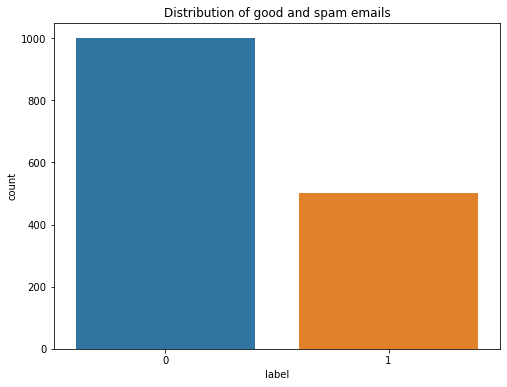

In [4]:
# we can observe imbalance in the data here 
plt.figure(figsize=(8,6))
plt.title('Distribution of good and spam emails')
sns.countplot(spam_data.label)
# Percentage of spam emails
# good_email = spam_data[spam_data.label=='0']
# spam_email = spam_data[spam_data.label=='1']
# (len(spam_email)/len(good_email))*100

In [5]:
# One way to fix it is to downsample the good emails
spam_data[spam_data['label']=='0'] = spam_data[spam_data['label']=='0'].sample(n = len(spam_data[spam_data['label']=='1']), random_state = 33)
spam_data.shape

(1500, 2)

In [ ]:
spam_data.shape

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Distribution of good and spam emails')
sns.countplot(spam_data.label)

# Train


In [ ]:
# Change the data type of the target column to int (fixes the "Cast string to float is not supported" issue)
spam_data["label"] = spam_data["label"].astype(str).astype(int)
# convert label to numpy arrays to fit deep learning models
email_labels = spam_data['label'].values